 # Importing the Required Libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Loading the Dataset

In [10]:
# Try reading the CSV file with different encodings to find the correct one

encodings_to_try = ['utf-8', 'latin1', 'utf-16']
for encoding in encodings_to_try:
    try:
        transaction_data = pd.read_csv('card_transdata.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

transaction_data
#Displaying the data



,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


# Visualizing the Data

array([[<Axes: title={'center': 'distance_from_home'}>,
        <Axes: title={'center': 'distance_from_last_transaction'}>,
        <Axes: title={'center': 'ratio_to_median_purchase_price'}>],
       [<Axes: title={'center': 'repeat_retailer'}>,
        <Axes: title={'center': 'used_chip'}>,
        <Axes: title={'center': 'used_pin_number'}>],
       [<Axes: title={'center': 'online_order'}>,
        <Axes: title={'center': 'fraud'}>, <Axes: >]], dtype=object)

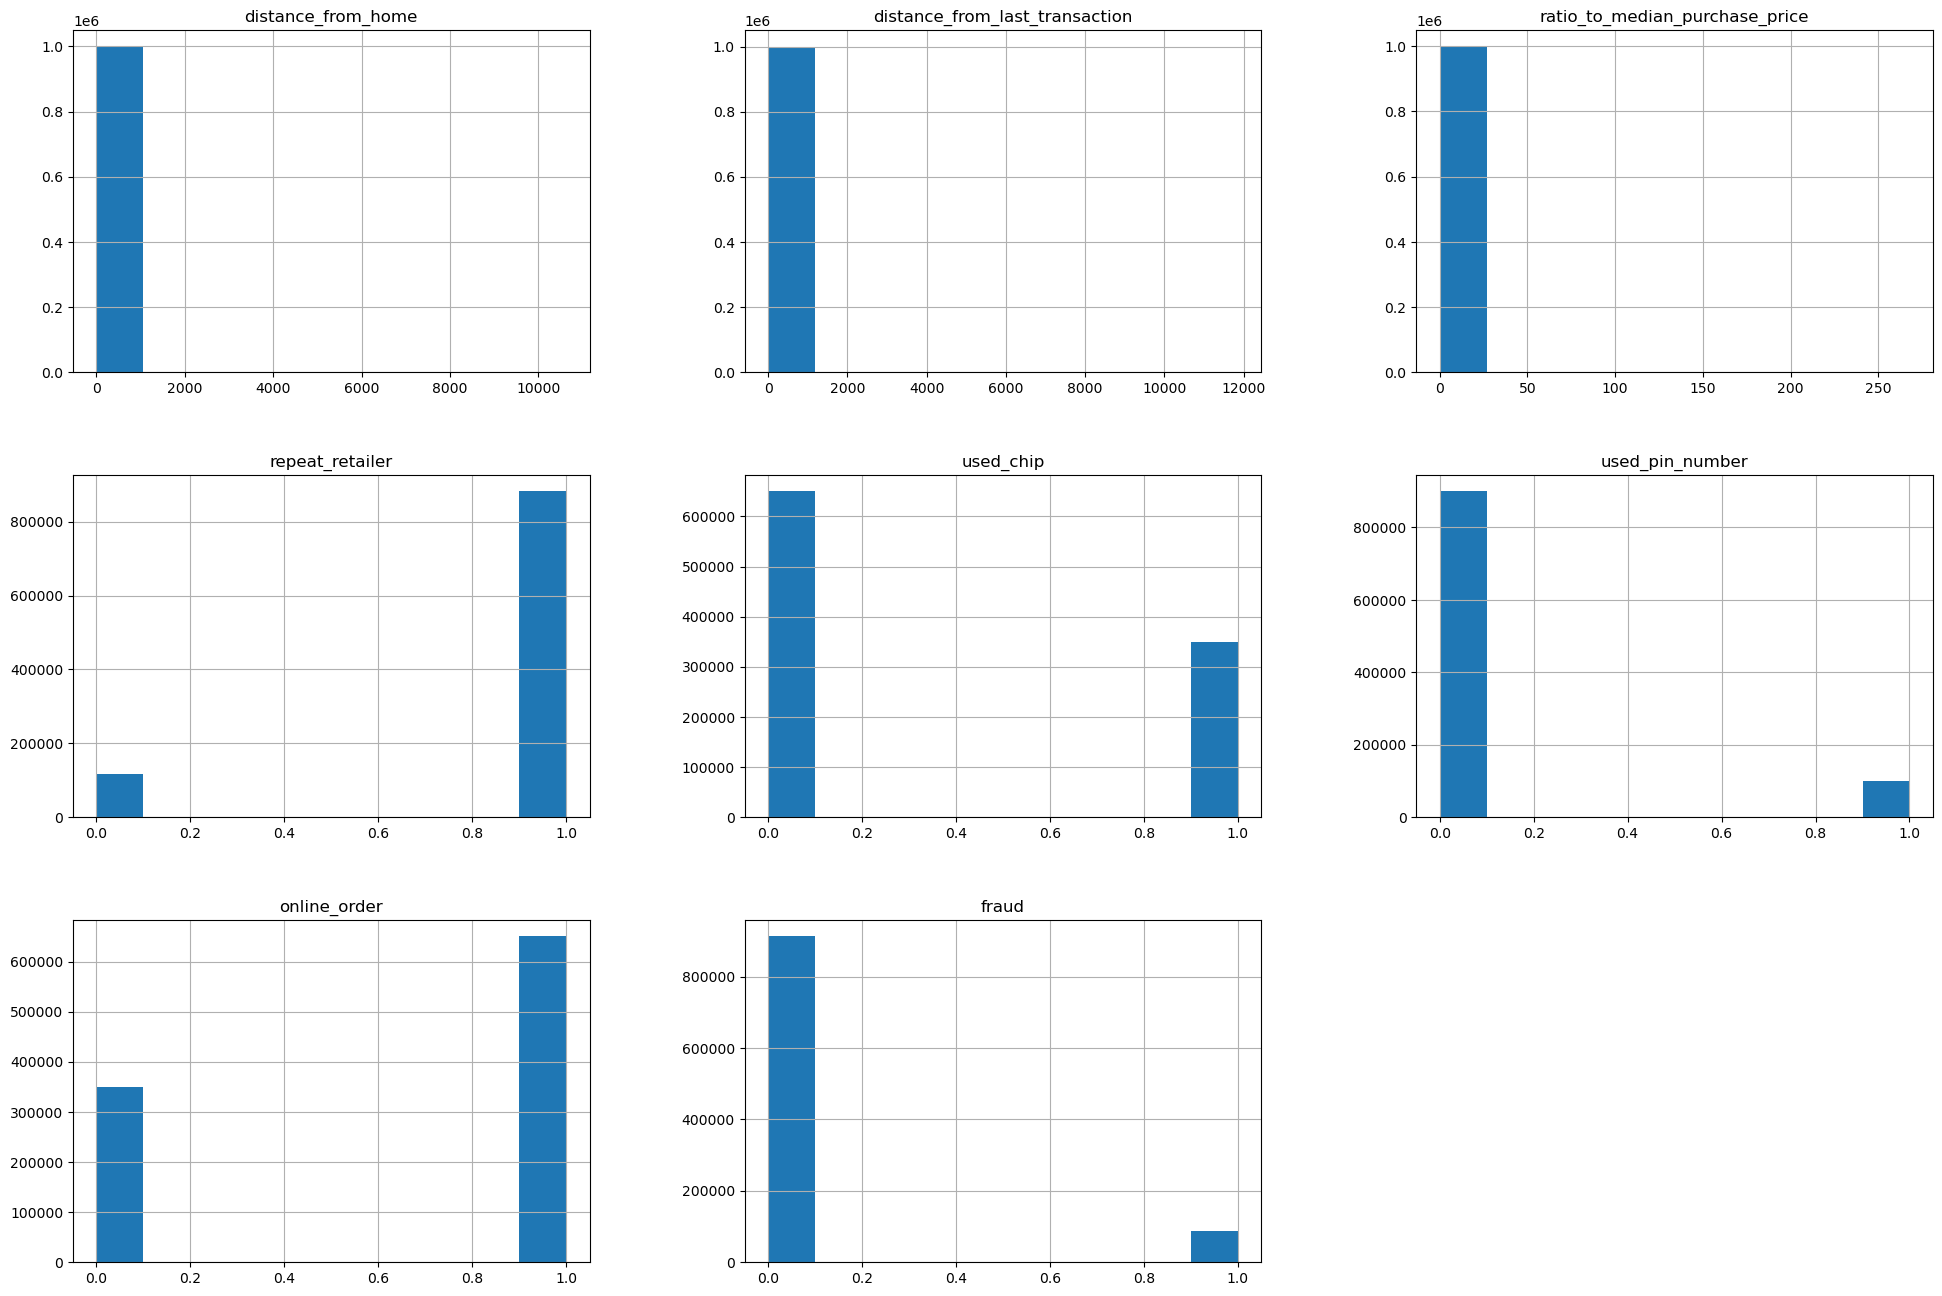

In [12]:
transaction_data.hist(figsize=(24, 16))

# Splitting the Data for Training

In [19]:
#Input and Output 
X = transaction_data.drop('fraud', axis=1)
y = transaction_data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(800000, 7) (800000,) (200000, 7) (200000,)


# Training Logistic Regression Model

In [20]:
#Initializing the model and training the data 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


C:\Users\user\Documents\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
# Predict on the test set
predictions = log_reg.predict(X_test)

# Calculating our accuracy of the Model

In [24]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.95566
Confusion Matrix:
[[181251   1306]
 [  7562   9881]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.88      0.57      0.69     17443

    accuracy                           0.96    200000
   macro avg       0.92      0.78      0.83    200000
weighted avg       0.95      0.96      0.95    200000

